In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("light_mode")
plt.rcParams["axes.linewidth"] = 3

In [2]:
full_data_dir = "/global/cscratch1/sd/james12/NEXUS_analysis/Full_Species_1024_snap_099/all_halos/"
dm_data_dir = "/global/cscratch1/sd/james12/NEXUS_analysis/DM_only_1024_snap_099/all_halos/"


clusbool_full = np.load(full_data_dir + "density_cube_snap_099_full_1024_all_species_cluster_bool_filter.npy")
filbool_full = np.load(full_data_dir + "density_cube_snap_099_full_1024_all_species_filament_bool_filter.npy")
wallbool_full = np.load(full_data_dir + "density_cube_snap_099_full_1024_all_species_wall_bool_filter.npy")

clusbool_dm = np.load(dm_data_dir + "density_cube_snap_099_full_1024_dm_cluster_bool_filter.npy")
filbool_dm = np.load(dm_data_dir + "density_cube_snap_099_full_1024_dm_filament_bool_filter.npy")
wallbool_dm = np.load(dm_data_dir + "density_cube_snap_099_full_1024_dm_wall_bool_filter.npy")

In [3]:
void_bool_full = ~(clusbool_full + filbool_full + wallbool_full)

In [4]:
void_bool_dm = ~(clusbool_dm + filbool_dm + wallbool_dm)

In [5]:

from matplotlib.colors import ListedColormap

Red = np.array([[0., 0., 0., 0.],
                [0.9, 0.        , 0.05098039, 1.        ]])

Green = np.array([[0., 0., 0., 0.],
                  [0.        , 0.76666667, 0.10588235, 1.        ]])

Blue = np.array([[0., 0., 0., 0.],
                 [0.03137255, 0.18823529, 0.81960784, 1.        ]])

Orange = np.array([[0., 0., 0., 0.],
                [1.0, 94/255        , 0.0, 1.        ]])

Purple = (Red + Blue) /4

Silver = np.array([[0., 0., 0., 0.],
                   [192/255,192/255,192/255, 1.        ]])



cmap_red = ListedColormap(Red)
cmap_green = ListedColormap(Green)
cmap_blue = ListedColormap(Blue)
cmap_purple = ListedColormap(Purple)
cmap_orange = ListedColormap(Orange)
cmap_silver = ListedColormap(Silver)

In [6]:
# del den
den_TNG = np.load("/global/cscratch1/sd/james12/simple_density_cubes/density_cube_snap_099_full_1024_all_species.npy")
den_dm = np.load("/global/cscratch1/sd/james12/simple_density_cubes/density_cube_snap_099_full_1024_dm.npy")

In [24]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

fontprops = fm.FontProperties(size=18)


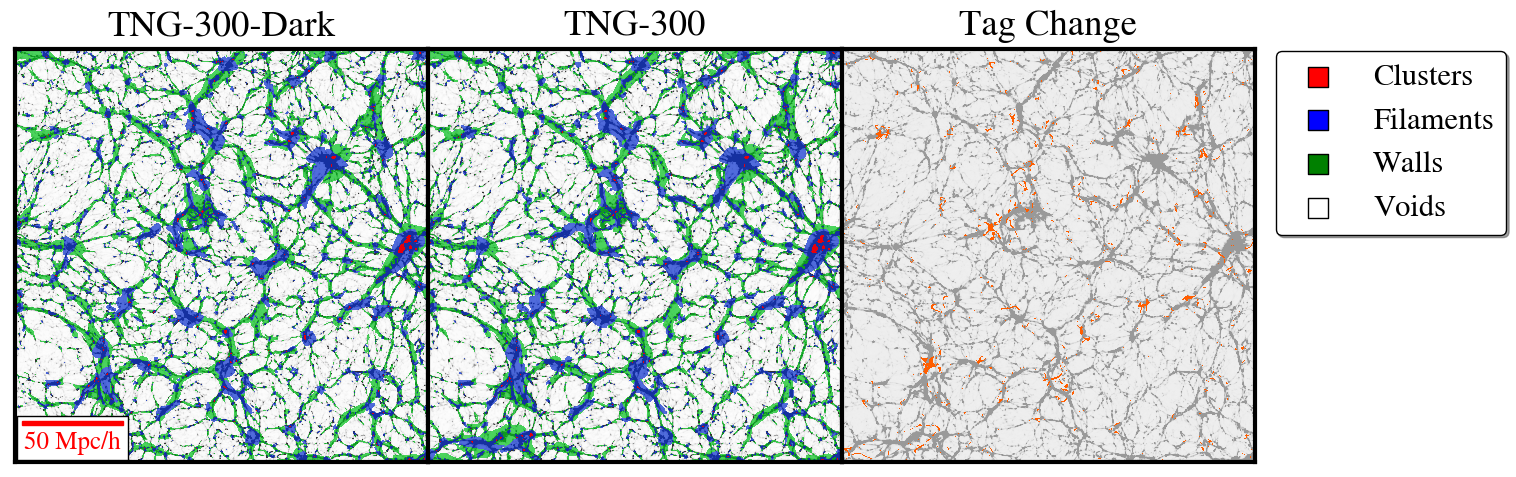

In [45]:
slice_N = 1020

f, axes = plt.subplots(1,3, gridspec_kw={'wspace':0.0, 'hspace':-0.3},squeeze=True,figsize=(16,6))

axes[0].imshow(den_dm[slice_N,:,:], cmap="Greys", origin="lower",extent=(0,205,0,205), vmax=1, alpha = 0.8)
axes[0].imshow(wallbool_dm[slice_N,:,:], origin="lower",extent=(0,205,0,205),  cmap=cmap_green, alpha=0.7)
axes[0].imshow(filbool_dm[slice_N,:,:], origin="lower", extent=(0,205,0,205), cmap=cmap_blue, alpha=0.7)
axes[0].imshow(clusbool_dm[slice_N,:,:],origin="lower", extent=(0,205,0,205),  cmap=cmap_red)
axes[0].set_title("TNG-300-Dark", pad=10)
# axes[0].set_xlabel("x [Mpc/h]")
# axes[0].set_ylabel("y [Mpc/h]")
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])

axes[1].imshow(den_TNG[slice_N,:,:], cmap="Greys", origin="lower",extent=(0,205,0,205), vmax=1, alpha = 0.8)
axes[1].imshow(wallbool_full[slice_N,:,:], origin="lower",extent=(0,205,0,205),  cmap=cmap_green, alpha=0.7)
axes[1].imshow(filbool_full[slice_N,:,:], origin="lower", extent=(0,205,0,205), cmap=cmap_blue, alpha=0.7)
axes[1].imshow(clusbool_full[slice_N,:,:],origin="lower", extent=(0,205,0,205),  cmap=cmap_red)
# axes[1].imshow(void_bool_full[slice_N,:,:],origin="lower", extent=(0,205,0,205),  
#                cmap=cmap_purple,alpha=0.6, zorder=0)
axes[1].set_title("TNG-300", pad=10)
axes[1].set_xticklabels([])
axes[1].set_yticklabels([])
axes[1].set_xticks([])
axes[1].set_yticks([])
# axes[1].set_xlabel("x [Mpc/h]")
# axes[1].set_ylabel("y [Mpc/h]")

axes[2].imshow(den_TNG[slice_N,:,:], cmap="Greys_r", origin="lower",extent=(0,205,0,205), vmax=1, alpha = 0.1)
axes[2].imshow(den_TNG[slice_N,:,:], cmap="Greys", origin="lower",extent=(0,205,0,205), vmax=1, alpha = 0.4)


diff_clusbool = clusbool_full[slice_N,:,:] != clusbool_dm[slice_N,:,:]
diff_filbool = filbool_full[slice_N,:,:] != filbool_dm[slice_N,:,:]
diff_wallbool = wallbool_full[slice_N,:,:] != wallbool_dm[slice_N,:,:]
diff_voidbool = void_bool_full[slice_N,:,:] != void_bool_dm[slice_N,:,:]

axes[2].imshow(diff_wallbool, origin="lower",extent=(0,205,0,205),  cmap=cmap_orange)
axes[2].imshow(diff_filbool, origin="lower", extent=(0,205,0,205), cmap=cmap_orange)
axes[2].imshow(diff_clusbool,origin="lower", extent=(0,205,0,205),  cmap=cmap_orange)
axes[2].imshow(diff_voidbool,origin="lower", extent=(0,205,0,205),  cmap=cmap_orange)
axes[2].set_title("Tag Change", pad=10)
axes[2].set_xticklabels([])
axes[2].set_yticklabels([])
axes[2].set_xticks([])
axes[2].set_yticks([])

axes[2].scatter([],[],color="red", marker="s",edgecolor="black", s=200, label="Clusters")
axes[2].scatter([],[], color="blue", marker="s", edgecolor="black",s=200, label="Filaments")
axes[2].scatter([],[], color="green", marker="s",edgecolor="black", s=200,label="Walls")
axes[2].scatter([],[], color="white",edgecolor="black", marker="s",s=200, label="Voids")
axes[2].legend(shadow=True, edgecolor="black", loc=(1.05,0.55))

scalebar0 = AnchoredSizeBar(axes[0].transData,
                           50, '50 Mpc/h', 'lower left', 
                           pad=0.2,
                           color='red',
                           frameon=True,
                           size_vertical=2,
                           fontproperties=fontprops, sep=4)

# scalebar1 = AnchoredSizeBar(axes[1].transData,
#                            50, '50 Mpc/h', 'lower left', 
#                            pad=0.2,
#                            color='black',
#                            frameon=True,
#                            size_vertical=2,
#                            fontproperties=fontprops, sep=4)

# scalebar2 = AnchoredSizeBar(axes[2].transData,
#                            50, '50 Mpc/h', 'lower left', 
#                            pad=0.2,
#                            color='red',
#                            frameon=True,
#                            size_vertical=2,
#                            fontproperties=fontprops, sep=4)

axes[0].add_artist(scalebar0)
# axes[1].add_artist(scalebar1)
# axes[2].add_artist(scalebar2)

# plt.savefig("final_tagging_figure.pdf", dpi=300, bbox_inches="tight")
# plt.tight_layout()
plt.show()


